In [1]:
pip install imbalanced-learn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [3]:
heart_df = pd.read_csv("/content/Heart_Failure_Dataset/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
OneHotEncoder = OneHotEncoder(sparse_output=False)

target_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


for i in target_columns:
  heart_df[i] = OneHotEncoder.fit_transform(heart_df[[i]])
  print(heart_df.value_counts([i]), '\n\n------')

Sex
0.0    725
1.0    193
Name: count, dtype: int64 

------
ChestPainType
1.0              496
0.0              422
Name: count, dtype: int64 

------
RestingECG
0.0           730
1.0           188
Name: count, dtype: int64 

------
ExerciseAngina
1.0               547
0.0               371
Name: count, dtype: int64 

------
ST_Slope
0.0         855
1.0          63
Name: count, dtype: int64 

------


In [12]:
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [13]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 86.2 KB


In [14]:
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier()

param_grid = {
      'max_depth': [3, 5, 7, None],
      'min_samples_split': [2, 5, 10],
      'criterion': ['gini', 'entropy']
      }

In [16]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy', # or 'f1', 'roc_auc', etc
                           n_jobs=-1
                           ) # Use all available processors

In [17]:
y = heart_df['HeartDisease']
X = heart_df.drop(['HeartDisease'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [18]:
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_: .2f}")

Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score:  0.81


In [30]:

model = HistGradientBoostingClassifier(max_bins=12, max_iter=100)
model.fit(X_train, y_train) # Fit training set to model
y_pred = model.predict(X_test) # Train prediciton
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.793


In [21]:
clf = HistGradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [22]:
df = X.copy()
df['target'] = y

df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,0.540305,132.396514,198.799564,0.233115,0.204793,136.809368,0.595861,0.887364,0.068627,0.553377
std,9.432617,0.407701,0.498645,18.514154,109.384145,0.423046,0.403770,25.460334,0.490992,1.066570,0.252957,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,223.000000,0.000000,0.000000,138.000000,1.000000,0.600000,0.000000,1.000000
75%,60.000000,0.000000,1.000000,140.000000,267.000000,0.000000,0.000000,156.000000,1.000000,1.500000,0.000000,1.000000
max,77.000000,1.000000,1.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000


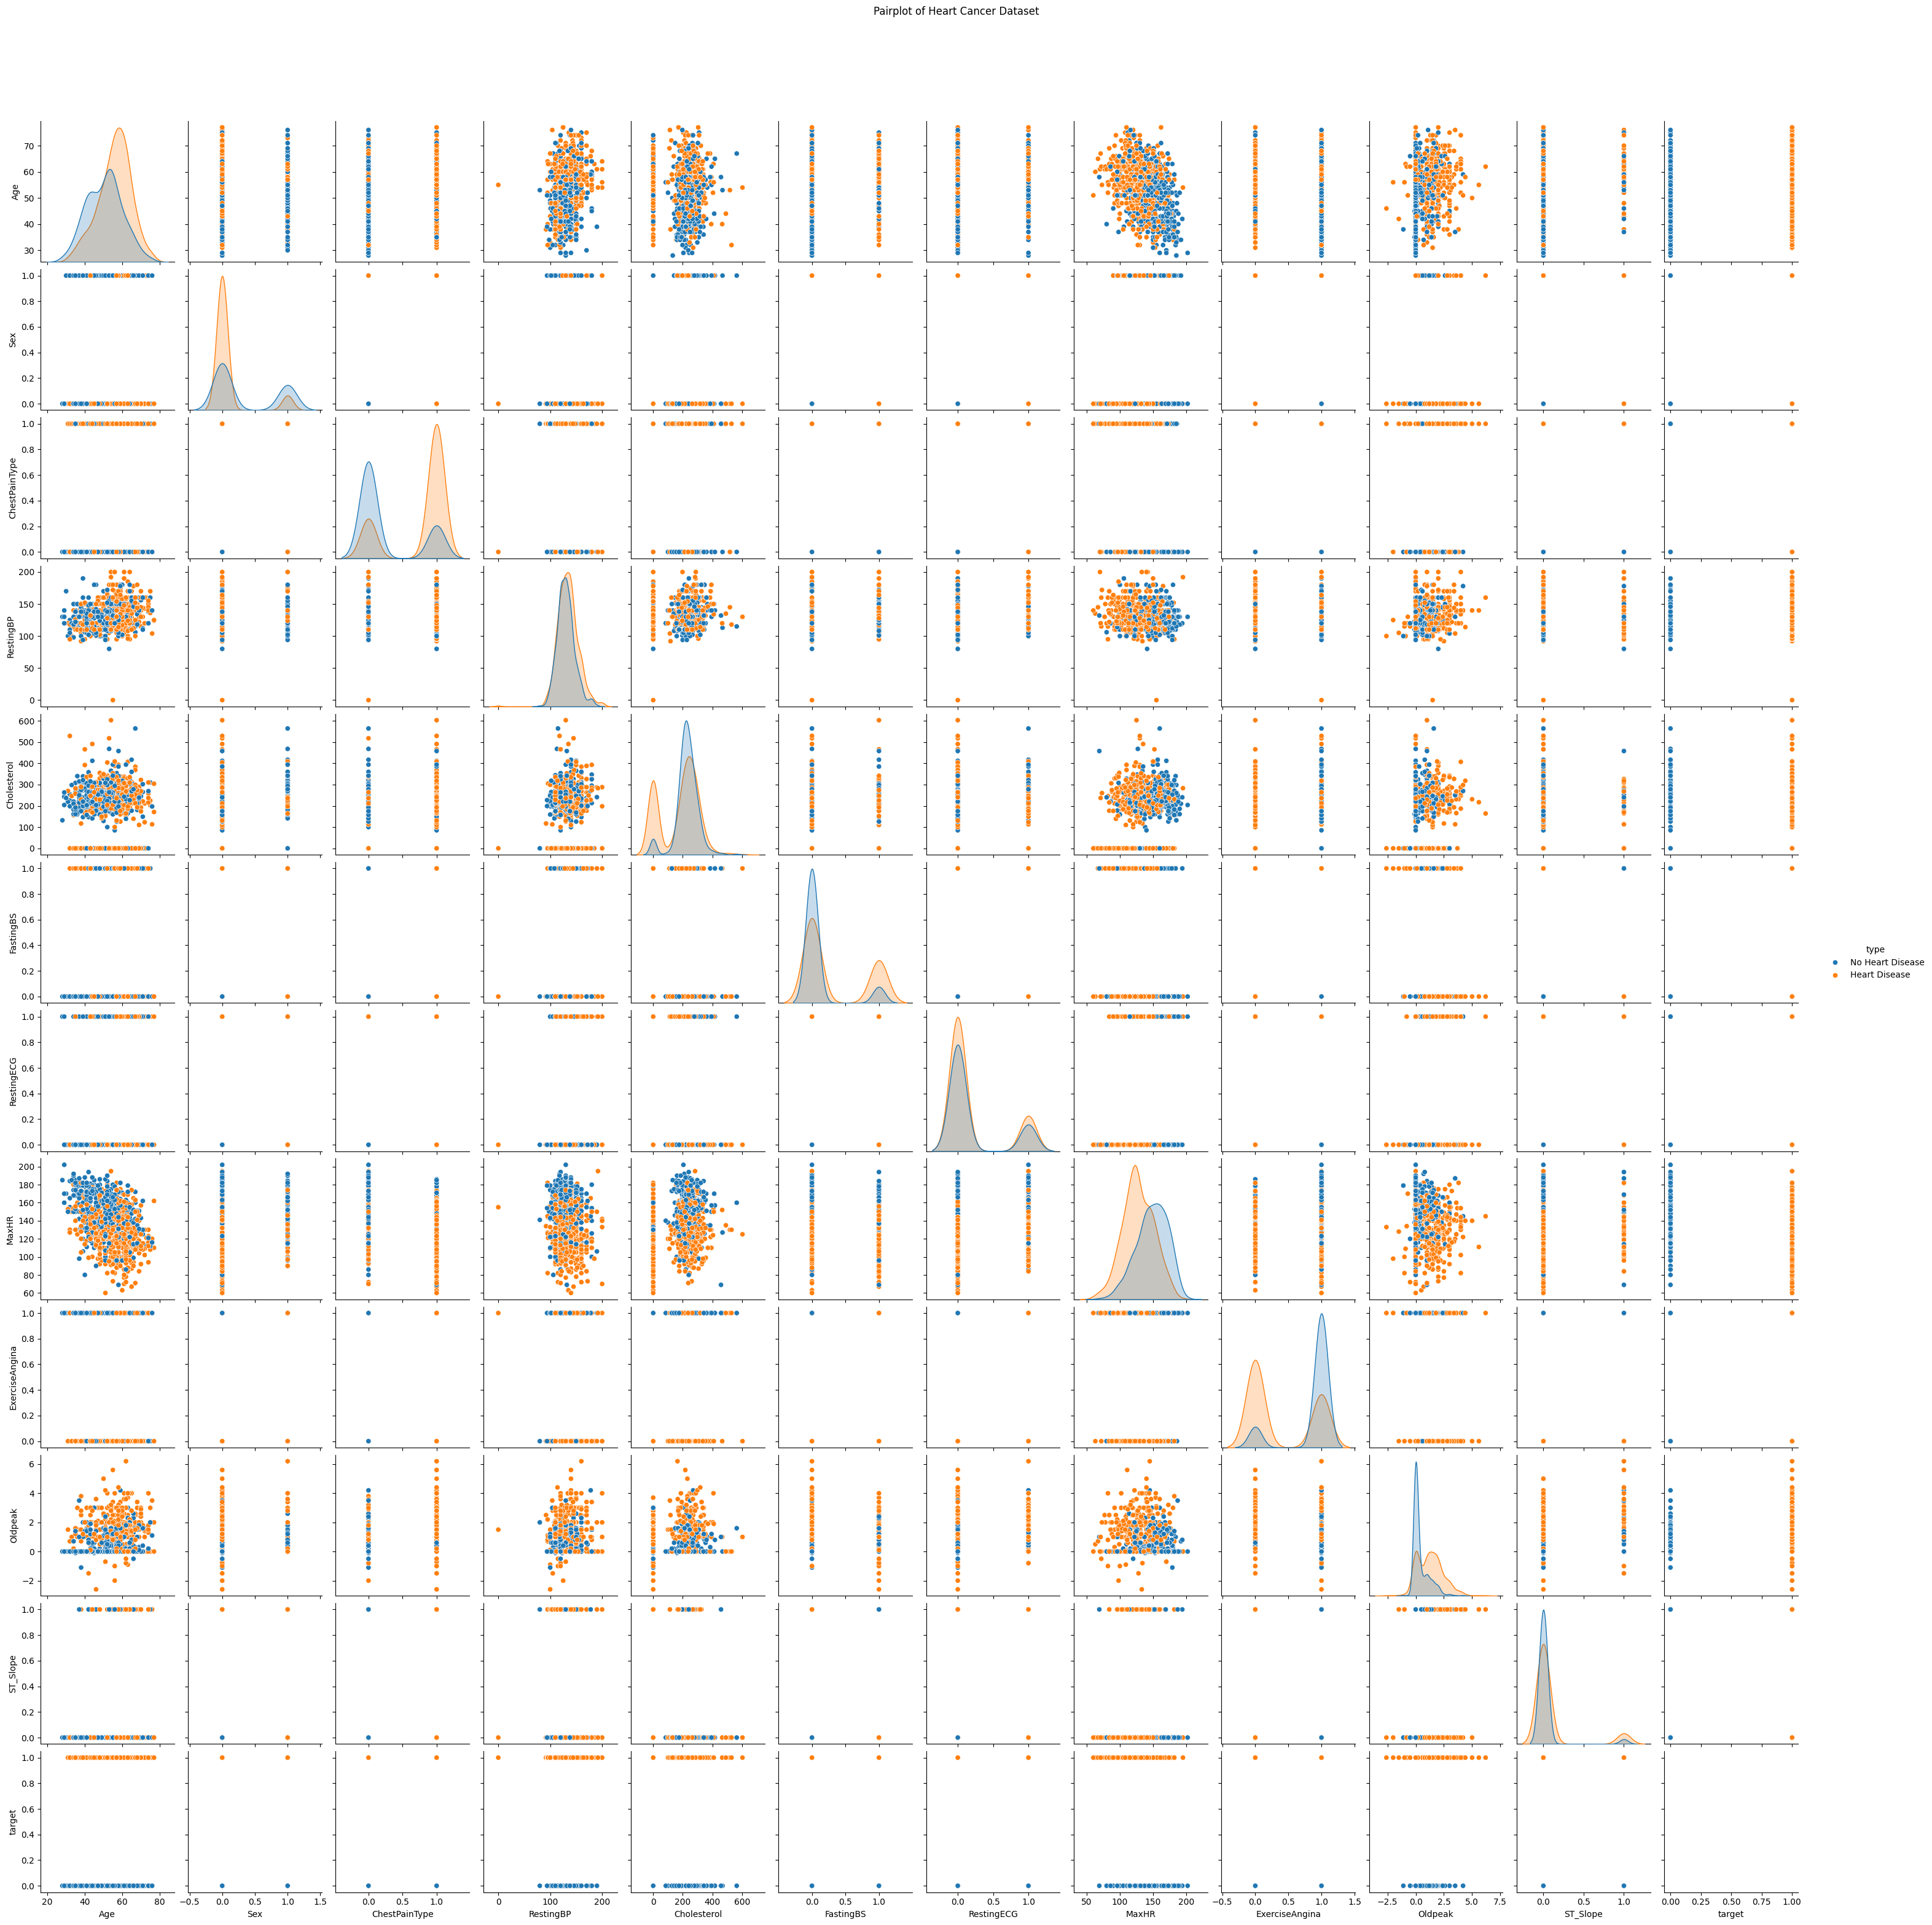

In [23]:
df = X.copy()
df['target'] = y

# Define a mapping for the target variable (0 and 1) to descriptive names
target_names_map = {0: 'No Heart Disease', 1: 'Heart Disease'}
df['type'] = df['target'].map(target_names_map)

sns.pairplot(df, hue="type")
plt.suptitle("Pairplot of Heart Cancer Dataset", y=1.02)
plt.show()